# Libraries yang digunakan

In [1]:
import numpy as np 

import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 99)

import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

# Importing data

In [2]:
loan_data=pd.read_csv('loan_data_2007_2014.csv', index_col=0)

C:\Users\USER\AppData\Local\Temp\ipykernel_17268\288333024.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data=pd.read_csv('loan_data_2007_2014.csv', index_col=0)


# Exploring data

In [3]:
loan_data.shape

(466285, 74)

In [4]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,2022-12-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,1985-01-01,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,2022-01-15,171.62,NaN,2022-01-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2022-12-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,1999-04-01,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2022-04-13,119.66,NaN,2022-09-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,2022-12-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,2022-11-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,2022-06-14,649.91,NaN,2022-01-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2022-12-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,1996-02-01,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,2022-01-15,357.48,NaN,2022-01-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,2022-12-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,1996-01-01,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,2022-01-16,67.79,2022-02-16,2022-01-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

# Target Variable

Tujuan utama dalam project ini adalah untuk melakukan prediksi terhadap individu akan kemampuan mereka terkait pembayaran atas pinjaman atau kredit yang diberikan. Dalam project ini loan_status dijadikan sebagai variabel target karena dapat mencerminkan kemampuan masing-masing individu terkait pembayaran atas pinjaman/kredit yang diberikan.

In [6]:
loan_data.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

Jika loan_statusnya “Charged Off, Default, Does not meet the credit policy. Status:Charged Off, Late (31-120 days) akan dianggap sebagai bad_loan atau 1 dan nilai selain itu akan dianggap good_loan atau 0.

In [7]:
bad_loan = [
    'Charged Off' 
    , 'Default' 
    , 'Does not meet the credit policy. Status:Charged Off'
    , 'Late (31-120 days)'
]
loan_data['loan_label'] = np.nan

def loan_label(status):
    if status in bad_loan:
        return 1
    else:
        return 0
    
loan_data['loan_label'] = loan_data['loan_status'].apply(loan_label)

In [8]:
loan_data.drop(['loan_status'],axis=1, inplace=True)

Melihat distribusi 0 dan 1

In [9]:
loan_data.loan_label.value_counts()

0    415317
1     50968
Name: loan_label, dtype: int64

In [10]:
loan_data.loan_label.value_counts(normalize=True)

0    0.890693
1    0.109307
Name: loan_label, dtype: float64

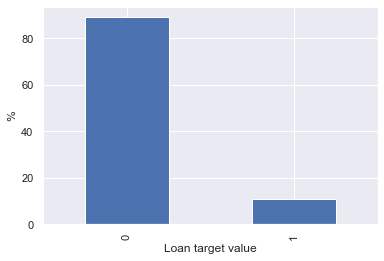

In [11]:
pl = loan_data['loan_label'].value_counts(normalize=True).mul(100).plot(kind='bar')
ay = pl.set_ylabel("%")
ax = pl.set_xlabel("Loan target value")

# Cleaning data, Preprocessing dan Feature Engineering

Membuang feature-feature yang tidak berguna seperti id, member id, free text, nilai kosong(NULL), dll.

In [12]:
cols_to_drop = [
    #id & member id
    'id'
    , 'member_id'
    
    #free text
    , 'url'
    , 'desc'
    
    #Null, constant, others
    , 'zip_code'
    , 'annual_inc_joint'
    , 'dti_joint'
    , 'verification_status_joint'
    , 'open_acc_6m'
    , 'open_il_6m'
    , 'open_il_12m'
    , 'open_il_24m'
    , 'mths_since_rcnt_il'
    , 'total_bal_il'
    , 'il_util'
    , 'open_rv_12m'
    , 'open_rv_24m'
    , 'max_bal_bc'
    , 'all_util'
    , 'inq_fi'
    , 'total_cu_tl'
    , 'inq_last_12m'
    
    #expert judgment
    , 'sub_grade'
]

In [13]:
loan_data = loan_data.drop(cols_to_drop, axis=1)

In [14]:
loan_data.select_dtypes(['object']).columns

Index(['term', 'grade', 'emp_title', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'pymnt_plan', 'purpose', 'title',
       'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'next_pymnt_d', 'last_credit_pull_d', 'application_type'],
      dtype='object')

# term

In [15]:
loan_data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

Modifikasi 36 months dan 60 months menjadi 36 dan 60

In [16]:
loan_data['term']=loan_data['term'].apply(lambda x:int(x[:3]))

In [17]:
loan_data['term']=loan_data['term'].astype(float)

# emp_length

In [18]:
loan_data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [19]:
loan_data['emp_length'] = loan_data['emp_length'].str.replace('\+ years', '')
loan_data['emp_length'] = loan_data['emp_length'].str.replace(' years', '')
loan_data['emp_length'] = loan_data['emp_length'].str.replace('< 1 year', str(0))
loan_data['emp_length'] = loan_data['emp_length'].str.replace(' year', '')

C:\Users\USER\AppData\Local\Temp\ipykernel_17268\1231114644.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  loan_data['emp_length'] = loan_data['emp_length'].str.replace('\+ years', '')


In [20]:
loan_data['emp_length'] = loan_data['emp_length'].astype(float)

# earliest_cr_line, issue_d, last_pymnt_d, next_pymnt_d, last_credit_pull_d

In [21]:
col_date = ['earliest_cr_line', 'issue_d', 'last_pymnt_d',
                    'next_pymnt_d', 'last_credit_pull_d']

In [22]:
for col in col_date:
    loan_data[col] = pd.to_datetime(loan_data[col])

# Exploratory data analysis


Correlation between features

<AxesSubplot:>

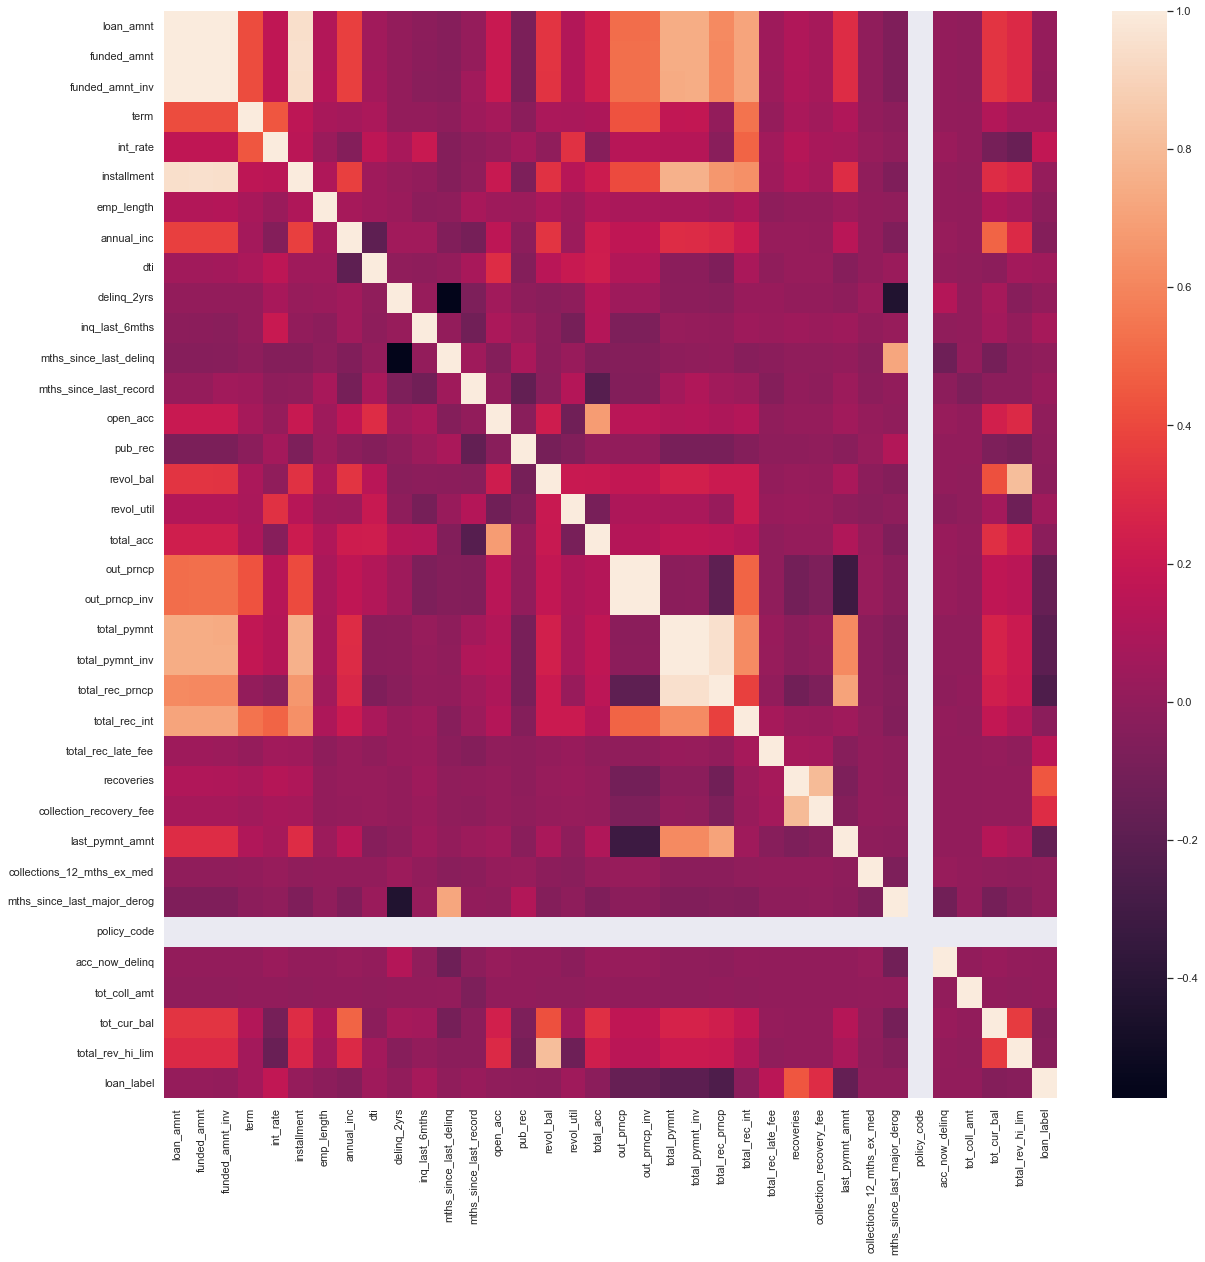

In [23]:
plt.figure(figsize=(20,20))
sns.heatmap(loan_data.corr())

In [24]:
corr_matrix = loan_data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]

C:\Users\USER\AppData\Local\Temp\ipykernel_17268\4215706819.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [25]:
to_drop_hicorr

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'mths_since_last_major_derog',
 'total_rev_hi_lim']

In [26]:
loan_data.drop(to_drop_hicorr, axis=1, inplace=True)

# Categorical Features

In [27]:
loan_data.select_dtypes(include='object').nunique()

grade                       7
emp_title              205475
home_ownership              6
verification_status         3
pymnt_plan                  2
purpose                    14
title                   63094
addr_state                 50
initial_list_status         2
application_type            1
dtype: int64

drop feature yang memiliki nilai unik paling tinggi dan feature yang memiliki satu nilai unik.

In [28]:
loan_data.drop(['emp_title','title','application_type'],axis=1, inplace=True)

In [29]:
loan_data.select_dtypes(exclude='object').nunique()

loan_amnt                       1352
term                               2
int_rate                         506
emp_length                        11
annual_inc                     31901
issue_d                           91
dti                             3997
delinq_2yrs                       24
earliest_cr_line                 664
inq_last_6mths                    28
mths_since_last_delinq           145
mths_since_last_record           123
open_acc                          62
pub_rec                           26
revol_bal                      58142
revol_util                      1269
total_acc                        112
out_prncp                     135665
total_rec_late_fee              5808
recoveries                     22773
last_pymnt_d                      98
next_pymnt_d                     100
last_credit_pull_d               103
collections_12_mths_ex_med         9
policy_code                        1
acc_now_delinq                     6
tot_coll_amt                    6321
t

terdapat satu fitur yang memiliki satu nilai unik, maka fitur ini pun ikut dibuang.

In [30]:
loan_data.drop(['policy_code'], axis=1, inplace=True)

Drop fitur yang tidak relevan

In [31]:
loan_data.drop(['last_credit_pull_d','last_pymnt_d','next_pymnt_d', 'issue_d','earliest_cr_line'],axis=1, inplace=True)

In [32]:
for col in loan_data.select_dtypes(include='object').columns.tolist():
    print(loan_data[col].value_counts(normalize=True)*100)
    print('\n')

B    29.365946
C    26.870476
D    16.489486
A    16.056060
E     7.668486
F     2.837106
G     0.712440
Name: grade, dtype: float64


MORTGAGE    50.586015
RENT        40.420129
OWN          8.943886
OTHER        0.039032
NONE         0.010723
ANY          0.000214
Name: home_ownership, dtype: float64


Verified           36.041262
Source Verified    32.167666
Not Verified       31.791072
Name: verification_status, dtype: float64


n    99.99807
y     0.00193
Name: pymnt_plan, dtype: float64


debt_consolidation    58.804165
credit_card           22.337626
home_improvement       5.691155
other                  5.080584
major_purchase         2.107724
small_business         1.504016
car                    1.157447
medical                0.986950
moving                 0.642097
vacation               0.533365
wedding                0.502482
house                  0.486612
educational            0.090503
renewable_energy       0.075276
Name: purpose, dtype: float64


CA    15.323247
NY  

terdapat fitur yang mendominasi salah satu nilai, maka fitur ini ikut dibuang.

In [33]:
loan_data.drop('pymnt_plan', axis=1, inplace=True)

# Missing value

Pada bagian ini feature yang memiliki lebih dari 75% akan di remove. Sedangkan feature yang memiliki missing values sedikit akan diganti dengan nilai.

Menampilkan persentase missing values:

In [34]:
check_missing = loan_data.isnull().sum() * 100 / loan_data.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

mths_since_last_record        86.566585
mths_since_last_delinq        53.690554
tot_coll_amt                  15.071469
tot_cur_bal                   15.071469
emp_length                     4.505399
revol_util                     0.072917
collections_12_mths_ex_med     0.031097
delinq_2yrs                    0.006219
inq_last_6mths                 0.006219
open_acc                       0.006219
pub_rec                        0.006219
total_acc                      0.006219
acc_now_delinq                 0.006219
annual_inc                     0.000858
dtype: float64

In [35]:
loan_data.drop('mths_since_last_record', axis=1, inplace=True)

In [36]:
loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean(), inplace=True)
loan_data['mths_since_last_delinq'].fillna(-1, inplace=True)

In [37]:
cols=loan_data[['tot_coll_amt','tot_cur_bal','emp_length','revol_util', 'collections_12_mths_ex_med', 'delinq_2yrs',
                  'inq_last_6mths', 'open_acc', 'pub_rec', 'total_acc', 'acc_now_delinq']]

for i in cols:
   loan_data[i].fillna(0, inplace=True)

# Feature Scaling and Transformation

## onehot encoding

In [38]:
categorical_cols = [col for col in loan_data.select_dtypes(include='object').columns.tolist()]

In [39]:
onehot = pd.get_dummies(loan_data[categorical_cols], drop_first=True)

In [40]:
onehot.head()

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w
0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Standardization

Semua kolom numerical akan dilakukan standardization

In [41]:
numerical_cols = [col for col in loan_data.columns.tolist() if col not in categorical_cols + ['loan_label']]

In [42]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
std = pd.DataFrame(ss.fit_transform(loan_data[numerical_cols]), columns=numerical_cols)

In [43]:
std.head()

,loan_amnt,term,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal
0,-1.124392,-0.616225,-0.729587,1.138605,-0.896551,1.328632,-0.357012,0.178920,-0.708792,-1.641166,-0.31429,-0.124888,1.159498,-1.384557,-0.693944,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648
1,-1.426088,1.622784,0.330634,-1.523744,-0.787387,-2.065791,-0.357012,3.843328,-0.708792,-1.641166,-0.31429,-0.703378,-1.965980,-1.815538,-0.693944,-0.123464,0.057470,-0.083608,-0.058307,-0.012089,-0.792648
2,-1.438156,-0.616225,0.488979,1.138605,-1.110294,-1.082491,-0.357012,1.095022,-0.708792,-1.841641,-0.31429,-0.642003,1.782070,-1.298361,-0.693944,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648
3,-0.521001,-0.616225,-0.077850,1.138605,-0.438063,0.354248,-0.357012,0.178920,0.860811,-0.237839,-0.31429,-0.514224,-1.478018,1.028934,-0.693944,3.099264,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648
4,-1.365749,1.622784,-0.261438,-1.257509,0.122311,0.091865,-0.357012,-0.737182,0.991612,0.764538,-0.31429,0.558748,-0.094058,1.115130,-0.573268,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648


# Transformed Dataframe

Menggabungkan kolom-kolom transformasi

In [44]:
loan_data_model = pd.concat([onehot, std, loan_data[['loan_label']]], axis=1)

# Modeling

Data Splitting

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X = loan_data_model.drop('loan_label', axis=1)
y = loan_data_model['loan_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<AxesSubplot:>

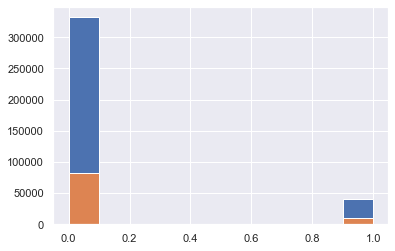

In [47]:
y_train.hist()
y_test.hist()

In [48]:
y_train.value_counts(normalize=True)

0    0.890684
1    0.109316
Name: loan_label, dtype: float64

In [49]:
X_train.shape, X_test.shape

((373028, 97), (93257, 97))

# Training

Pada project ini digunakan Algoritma Random Forest dan Logistik regresi

### 1. Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=4)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

Memprediksi hasil test set

In [51]:
y_pred=rfc.predict(X_test)

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[83067,     0],
       [ 9258,   932]], dtype=int64)

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     83067
           1       1.00      0.09      0.17     10190

    accuracy                           0.90     93257
   macro avg       0.95      0.55      0.56     93257
weighted avg       0.91      0.90      0.86     93257



Menampilkan feature importance

In [54]:
arr_feature_importances = rfc.feature_importances_
arr_feature_names = X_train.columns.values
    
df_feature_importance = pd.DataFrame(index=range(len(arr_feature_importances)), columns=['feature', 'importance'])
df_feature_importance['feature'] = arr_feature_names
df_feature_importance['importance'] = arr_feature_importances
df_all_features = df_feature_importance.sort_values(by='importance', ascending=False)
df_all_features

,feature,importance
92,recoveries,5.604000e-01
90,out_prncp,1.369573e-01
91,total_rec_late_fee,9.790962e-02
78,int_rate,7.496525e-02
3,grade_E,1.950905e-02
77,term,1.594778e-02
4,grade_F,1.371432e-02
2,grade_D,1.319133e-02
0,grade_B,1.159000e-02
80,annual_inc,1.006394e-02


#### Validation

Untuk mengukur performa model, dua metrik yang umum dipakai dalam dunia credit risk adalah AUC dan KS.

In [59]:
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

#### AUC

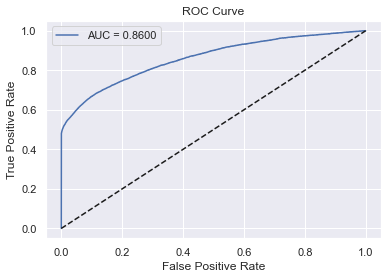

In [60]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

#### KS

In [61]:
df_actual_predicted = df_actual_predicted.sort_values('y_pred_proba')
df_actual_predicted = df_actual_predicted.reset_index()

df_actual_predicted['Cumulative N Population'] = df_actual_predicted.index + 1
df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['y_actual'].cumsum()
df_actual_predicted['Cumulative N Good'] = df_actual_predicted['Cumulative N Population'] - df_actual_predicted['Cumulative N Bad']
df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Population'] / df_actual_predicted.shape[0]
df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad'] / df_actual_predicted['y_actual'].sum()
df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good'] / (df_actual_predicted.shape[0] - df_actual_predicted['y_actual'].sum())

In [62]:
df_actual_predicted.head()

,index,y_actual,y_pred_proba,Cumulative N Population,Cumulative N Bad,Cumulative N Good,Cumulative Perc Population,Cumulative Perc Bad,Cumulative Perc Good
0,352638,0,0.049599,1,0,1,0.000011,0.0,0.000012
1,381877,0,0.049840,2,0,2,0.000021,0.0,0.000024
2,334474,0,0.049911,3,0,3,0.000032,0.0,0.000036
3,394065,0,0.049950,4,0,4,0.000043,0.0,0.000048
4,336330,0,0.050119,5,0,5,0.000054,0.0,0.000060


Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.5688')

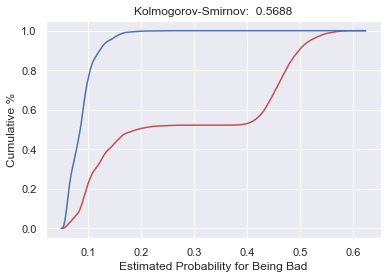

In [63]:
KS = max(df_actual_predicted['Cumulative Perc Good'] - df_actual_predicted['Cumulative Perc Bad'])

plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS)

### 2. Logistic Regression

In [64]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')

In [65]:
enc = OneHotEncoder(handle_unknown='ignore') 
enc.fit(X_train)
X_train_logistic = enc.transform(X_train)
X_test_logistic = enc.transform(X_test)
print(X_train_logistic.shape)

(373028, 422861)


In [66]:
categorical_features_list = loan_data.select_dtypes('object').columns

In [67]:
from sklearn import preprocessing
names = loan_data.columns
continious_features = [x for x in names if x not in categorical_features_list]
scaler = preprocessing.StandardScaler(with_mean=False).fit(X_train_logistic)
X_train_logistic = scaler.transform(X_train_logistic)

scaler = preprocessing.StandardScaler(with_mean=False).fit(X_test_logistic)
X_test_logistic = scaler.transform(X_test_logistic)

print(X_train_logistic.shape)

(373028, 422861)


In [68]:
X_train_logistic = enc.transform(X_train)
X_test_logistic = enc.transform(X_test)
print(X_train_logistic.shape)

(373028, 422861)


In [69]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train_logistic, y_train)

LogisticRegression()

Memprediksi hasil test set


In [70]:
y_pred = log_reg.predict(X_test_logistic)
cm = confusion_matrix(y_test, y_pred)
cm 

array([[82840,   227],
       [ 5100,  5090]], dtype=int64)

Check performa model menggunakan classification report

In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     83067
           1       0.96      0.50      0.66     10190

    accuracy                           0.94     93257
   macro avg       0.95      0.75      0.81     93257
weighted avg       0.94      0.94      0.93     93257



Dari classification report mengasilkan akurasi sebesar 0.94

In [72]:
roc_auc_score(y_test, y_pred)

0.7483882945241372

#### Kesimpulan

Algoritma Random Forest menghasilkan akurasi sebesar 0,89 dan menghasilkan performa AUC sebesar 0,85 dan KS sebesar 0,56. Sedangkan Logistic Regression menghasilkan akurasi sebesar 0,94 dan performa AUC sebesar 0,74. Pada dunia credit risk modeling, umumnya AUC di atas 0.7 dan KS diatas 0.3 sudah termasuk performa yang baik.